# Relationship_biomass_pg_th_ready_for_git

This notebook collates basal factor allometry ‘field data’ with persistent green zonal statistics and plots the data.
notebook infromation:
 - environment: zonal
 - author: Rob McGregor
 - date: 28/08/2022
 - licence: MIT

In [21]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

ModuleNotFoundError: No module named 'statsmodels'

In [20]:
#zonal stats directory containing persistant green sub dir with zonal stats data
dir_ = r"C:\Users\rmcgr\ntg_repo\from_grant\biomass_zonal_stats\rmcgr_20220828_1908_biomass_w_2013_obs"

# site total csv file produced from Biomass Field Data Clean
bio_path = r"Z:\Scratch\Rob\tern\tree_biomass_field_data\biomass_carbon\biomass_field_data_clean\biomass_totals_v1.csv"
bio_path = r"C:\Users\rmcgr\ntg_repository\tern\tree_biomass_field_data\biomass_carbon\biomass_field_data_clean\biomass_totals_v1.csv"

int_output_dir = r"C:\Users\rmcgr\ntg_repository\tern\outputs\scratch"
output_dir = r"C:\Users\rmcgr\ntg_repository\tern\outputs"

In [9]:
th_dir = os.path.join(dir_, "th_zonal_stats")
pg_dir = os.path.join(dir_, "pg_zonal_stats")

In [10]:
def glob_dir(dir_):
    
    """ This function searches for .csv files within the directory and, concatenates a complete dataframe.
    
    :param dir_: string object containing the path to a directory filled with persistent green zonal stat outputs.
    :return output: concatenated pandas dataframe object containing all persistent green zonal stats.
    """
    
    df_list = []
    for file_ in glob(os.path.join(dir_, "*.csv")):
        df = pd.read_csv(file_)
        df_list.append(df)
        
    output = pd.concat(df_list)
    
    return output
    

In [11]:
#th_df = glob_dir(th_dir)
pg_df = glob_dir(pg_dir)

In [12]:
pg_df.sample(2)

,ident,site,im_date,pg_mean,pg_std,pg_med,pg_min,pg_max,pg_count,pg_p25,pg_p50,pg_p75,pg_p95,pg_p99,pg_rng,im_name
5,69,btl01a,ztmre_nt,7.470588,1.288759,7.0,6.0,10.0,17,6.00,7.0,9.00,9.2,9.84,4.0,lztmre_nt_m201603201605_djaa2.tiff
1,43,mlp11a,ztmre_nt,3.450000,1.499166,3.5,1.0,6.0,20,2.75,3.5,4.25,6.0,6.00,5.0,lztmre_nt_m200506200508_djaa2.tiff


In [13]:
# site total csv file produced from Biomass Field Data Clean
bio = pd.read_csv(bio_path)
bio.sample(2)
print(bio.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'Z:\\Scratch\\Rob\\tern\\tree_biomass_field_data\\biomass_carbon\\biomass_field_data_clean\\biomass_totals_v1.csv'

In [14]:
def itterrows_df(df):
    
    """ This function iterates over a dataframe and splices the image name variable to extract the start and 
    end dates of the seasonal image zonal stats.
    
    :param df: dataframe object containing zonal stats of persistent green Landsat seasonal composites.
    :return df: dataframe object containing the input dataframe with two additional columns - st_date and end_date.
    """
    
    list_s = []
    list_e = []
    for index, row in df.iterrows():
        im = row["im_name"]
        year = im[11:15]
        month = im[15:17]
        
        from calendar import monthrange
        month_, day_range = monthrange(int(year), int(month))
        list_s.append(im[11:17] + "01")
        list_e.append(im[17:23] + str(day_range))

        
    df["st_date"] = list_s
    df["end_date"] = list_e
    
    return df
        

In [15]:
pg_df = itterrows_df(pg_df)

In [16]:
#export persistent green dataframe to intermediate output directory
pg_df.to_csv(os.path.join(int_output_dir, "pg_df.csv"))

FileNotFoundError: [Errno 2] No such file or directory: 'Z:\\Scratch\\Rob\\tern\\tree_biomass_field_data\\int_outputs\\pg_df.csv'

In [17]:
def date_time(pg_df):
    """ This function adds two date time columns from the start and end columns.
    
    :param pg_df: dataframe object containing the persistent green data.
    :return pg_df: dataframe object containing the persistent green data.
    """
    pg_df['st_date_dt'] = pd.to_datetime(pg_df['st_date'])
    pg_df['end_date_dt'] = pd.to_datetime(pg_df['end_date'])
    
    return pg_df

In [18]:
pg_df = date_time(pg_df)

In [19]:
bio.sample(5)

NameError: name 'bio' is not defined

In [15]:
def iterrows_df_bio(df):
    
    """ This function iterates over a dataframe rows and extracts and splices the start date string variable 
    to remove the day information (i.e. yyyymm) and appends it to the dataframe.

    :param df: dataframe object containing the biomass data.
    :return df: dataframe object containing the biomass data with an additional column ‘st_y_m’ containing yyyymm.
    """
    
    list_s = []
    list_e = []
    for index, row in df.iterrows():
        im = row["st_date"]
        list_s.append(im[:6])

    df["st_y_m"] = list_s

    return df

In [16]:
def bio_date_object(bio):
    
    """ This function extracts the date information and creates two columns one with string dates and one with date time objects.
    
    :param bio:dataframe object containing the biomass data.
    :return bio: dataframe object containing the biomass data with two additional columns ‘st_date' and 'st_date_dt'.
    """
    date_str = []
    for i in bio.date:
        date = i[:8]
        date_str.append(date)
    bio['st_date'] = date_str
    bio['st_date_dt'] = pd.to_datetime(date_str)
    
    return bio

In [17]:
bio = bio_date_object(bio)

In [18]:
bio_df = iterrows_df_bio(bio)

In [19]:
bio_df

,uid,site,date,lon_gda94,lat_gda94,factor_x,count,avg_alive,avg_dead,avg_total,...,total_twigs,total_bark,total_wood,total_bran,total_stems,total_agb,total_roots,st_date,st_date_dt,st_y_m
0,5,girra02,20120605,131.132000,-12.523407,0.10,7.0,20.714286,3.428571,24.142857,...,114.7510,448.3570,1458.639000,1106.1050,1906.996000,3123.120,641.186,20120605,2012-06-05,201206
1,1,lit01,20130426,131.061917,-12.547912,0.50,7.0,34.571429,1.428571,36.000000,...,1022.4900,3136.4900,14298.900000,7238.9800,17435.390000,25585.070,4780.440,20130426,2013-04-26,201304
2,2,buff01,20120713,130.894779,-11.793886,0.25,7.0,23.714286,1.857143,25.571429,...,364.8575,1113.5075,5674.637500,2658.0925,6788.145000,9757.335,1697.815,20120713,2012-07-13,201207
3,3,ep01,20120713,130.821649,-12.411103,0.50,7.0,26.428571,2.571429,29.000000,...,689.1850,2692.7950,8760.465000,6643.1750,11453.260000,18757.200,3850.910,20120713,2012-07-13,201207
4,4,girra01,20120605,131.078022,-12.514123,0.50,6.0,25.833333,1.166667,27.000000,...,623.7700,2074.4150,10860.523333,4491.3400,12935.224167,17994.760,3585.330,20120605,2012-06-05,201206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,66,mlp11a,20130810 08:46:21,135.649906,-17.311655,0.00,7.0,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.000000,0.0000,0.000000,0.000,0.000,20130810,2013-08-10,201308
65,67,mlp13,20130510 00:44:10,135.544166,-17.173267,0.00,7.0,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.000000,0.0000,0.000000,0.000,0.000,20130510,2013-05-10,201305
66,68,mlp14a,20130811 10:00:10,135.681963,-17.185512,0.00,7.0,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.000000,0.0000,0.000000,0.000,0.000,20130811,2013-08-11,201308
67,69,mlp15a,20130812 07:45:26,-133.304969,-89.383813,0.00,7.0,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.000000,0.0000,0.000000,0.000,0.000,20130812,2013-08-12,201308


In [20]:
bio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           69 non-null     int64         
 1   site          69 non-null     object        
 2   date          69 non-null     object        
 3   lon_gda94     69 non-null     float64       
 4   lat_gda94     69 non-null     float64       
 5   factor_x      69 non-null     float64       
 6   count         69 non-null     float64       
 7   avg_alive     69 non-null     float64       
 8   avg_dead      69 non-null     float64       
 9   avg_total     69 non-null     float64       
 10  total_leaves  69 non-null     float64       
 11  total_twigs   69 non-null     float64       
 12  total_bark    69 non-null     float64       
 13  total_wood    69 non-null     float64       
 14  total_bran    69 non-null     float64       
 15  total_stems   69 non-null     float64     

In [21]:
pg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 7
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ident        592 non-null    int64         
 1   site         592 non-null    object        
 2   im_date      592 non-null    object        
 3   pg_mean      590 non-null    float64       
 4   pg_std       590 non-null    float64       
 5   pg_med       590 non-null    float64       
 6   pg_min       590 non-null    float64       
 7   pg_max       590 non-null    float64       
 8   pg_count     592 non-null    int64         
 9   pg_p25       590 non-null    float64       
 10  pg_p50       590 non-null    float64       
 11  pg_p75       590 non-null    float64       
 12  pg_p95       590 non-null    float64       
 13  pg_p99       590 non-null    float64       
 14  pg_rng       590 non-null    float64       
 15  im_name      592 non-null    object        
 16  st_date   

In [22]:
# sort df based on st_date_dt datetime objects to assist with the merging of dataframe's.
bio_df.sort_values(by='st_date_dt', inplace=True)
print(bio_df)

    uid     site               date   lon_gda94  lat_gda94  factor_x  count  \
13   12  centa14           20120602  133.292003 -14.403075      0.25    7.0   
0     5  girra02           20120605  131.132000 -12.523407      0.10    7.0   
4     4  girra01           20120605  131.078022 -12.514123      0.50    6.0   
5     6   hshr01           20120606  131.062073 -12.416566      1.00    7.0   
8     9   wedo01           20120606  131.005019 -12.604008      0.10    7.0   
..  ...      ...                ...         ...        ...       ...    ...   
36   37   hls05a  20131012 06:50:08  133.986267 -18.139936      0.00    7.0   
37   38   hls06a  20131012 15:19:55  134.003532 -18.200721      0.00    7.0   
32   33   hls01a  20131013 09:01:07  133.884072 -18.304007      0.00    7.0   
33   34   hls02a  20131013 07:47:09  133.951391 -18.303494      0.00    7.0   
34   35   hls03a  20131013 15:21:17  133.921210 -18.154692      0.00    7.0   

    avg_alive  avg_dead  avg_total  ...  total_twig

In [23]:
# sort df based on st_date_dt datetime objects to assist with the merging of dataframe's.
pg_df.sort_values(by='st_date_dt', inplace=True)
print(pg_df)

    ident    site   im_date    pg_mean    pg_std  pg_med  pg_min  pg_max  \
0      32  atl24a  ztmre_nt   4.687500  0.681795     5.0     3.0     6.0   
0      83  mgb02a  ztmre_nt   6.500000  1.118034     7.0     4.0     8.0   
0      93  hls02a  ztmre_nt   1.000000  0.000000     1.0     1.0     1.0   
0      94  hls03a  ztmre_nt   1.066667  0.249444     1.0     1.0     2.0   
1      75  eva02a  ztmre_nt   1.222222  0.415740     1.0     1.0     2.0   
..    ...     ...       ...        ...       ...     ...     ...     ...   
7      79  hls04a  ztmre_nt   9.040000  1.076290     9.0     7.0    11.0   
7      94  hls03a  ztmre_nt   1.000000  0.000000     1.0     1.0     1.0   
7      93  hls02a  ztmre_nt   1.666667  0.816497     1.0     1.0     3.0   
7      65  gulf11  ztmre_nt  26.125000  3.672108    26.0    17.0    32.0   
7      32  wedo01  ztmre_nt  35.826087  3.897069    36.0    29.0    45.0   

    pg_count  pg_p25  pg_p50  pg_p75  pg_p95  pg_p99  pg_rng  \
0         16    4.00   

In [24]:
pg_all_df = pd.merge_asof(bio_df, pg_df, on="st_date_dt", by="site")

In [25]:
pg_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           69 non-null     int64         
 1   site          69 non-null     object        
 2   date          69 non-null     object        
 3   lon_gda94     69 non-null     float64       
 4   lat_gda94     69 non-null     float64       
 5   factor_x      69 non-null     float64       
 6   count         69 non-null     float64       
 7   avg_alive     69 non-null     float64       
 8   avg_dead      69 non-null     float64       
 9   avg_total     69 non-null     float64       
 10  total_leaves  69 non-null     float64       
 11  total_twigs   69 non-null     float64       
 12  total_bark    69 non-null     float64       
 13  total_wood    69 non-null     float64       
 14  total_bran    69 non-null     float64       
 15  total_stems   69 non-null     float64     

In [26]:
pg_all_df.columns

Index(['uid', 'site', 'date', 'lon_gda94', 'lat_gda94', 'factor_x', 'count',
       'avg_alive', 'avg_dead', 'avg_total', 'total_leaves', 'total_twigs',
       'total_bark', 'total_wood', 'total_bran', 'total_stems', 'total_agb',
       'total_roots', 'st_date_x', 'st_date_dt', 'st_y_m', 'ident', 'im_date',
       'pg_mean', 'pg_std', 'pg_med', 'pg_min', 'pg_max', 'pg_count', 'pg_p25',
       'pg_p50', 'pg_p75', 'pg_p95', 'pg_p99', 'pg_rng', 'im_name',
       'st_date_y', 'end_date', 'end_date_dt'],
      dtype='object')

In [27]:
# test2 = pg_all_df[["site", "date", "st_date_dt",  "pg_mean", "pg_min", 'pg_max', 'pg_med',"total_agb"]] #"st_date",
# test2

In [28]:
pg_all_df_clean = pg_all_df.dropna(subset=['pg_mean'])

In [29]:
pg_all_df_clean

,uid,site,date,lon_gda94,lat_gda94,factor_x,count,avg_alive,avg_dead,avg_total,...,pg_p25,pg_p50,pg_p75,pg_p95,pg_p99,pg_rng,im_name,st_date_y,end_date,end_date_dt
0,12,centa14,20120602,133.292003,-14.403075,0.25,7.0,19.142857,1.428571,20.571429,...,21.00,22.0,23.00,24.25,24.85,8.0,lztmre_nt_m201106201108_djaa2.tiff,20110601,20110830,2011-08-30
1,5,girra02,20120605,131.132000,-12.523407,0.10,7.0,20.714286,3.428571,24.142857,...,5.75,7.5,9.25,15.50,21.50,21.0,lztmre_nt_m201106201108_djaa2.tiff,20110601,20110830,2011-08-30
2,4,girra01,20120605,131.078022,-12.514123,0.50,6.0,25.833333,1.166667,27.000000,...,26.00,30.0,41.00,43.20,44.64,21.0,lztmre_nt_m201106201108_djaa2.tiff,20110601,20110830,2011-08-30
3,6,hshr01,20120606,131.062073,-12.416566,1.00,7.0,24.285714,3.142857,27.428571,...,51.25,54.5,56.00,61.90,63.58,20.0,lztmre_nt_m201106201108_djaa2.tiff,20110601,20110830,2011-08-30
4,9,wedo01,20120606,131.005019,-12.604008,0.10,7.0,31.571429,2.428571,34.000000,...,25.50,31.0,35.00,40.90,41.00,23.0,lztmre_nt_m201106201108_djaa2.tiff,20110601,20110830,2011-08-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,37,hls05a,20131012 06:50:08,133.986267,-18.139936,0.00,7.0,0.000000,0.000000,0.000000,...,5.00,6.0,6.00,7.00,7.00,5.0,lztmre_nt_m201106201108_djaa2.tiff,20110601,20110830,2011-08-30
65,38,hls06a,20131012 15:19:55,134.003532,-18.200721,0.00,7.0,0.000000,0.000000,0.000000,...,4.75,6.0,6.25,7.10,8.62,5.0,lztmre_nt_m201106201108_djaa2.tiff,20110601,20110830,2011-08-30
66,33,hls01a,20131013 09:01:07,133.884072,-18.304007,0.00,7.0,0.000000,0.000000,0.000000,...,7.00,8.0,8.00,9.00,9.00,5.0,lztmre_nt_m201106201108_djaa2.tiff,20110601,20110830,2011-08-30
67,34,hls02a,20131013 07:47:09,133.951391,-18.303494,0.00,7.0,0.000000,0.000000,0.000000,...,7.00,7.5,9.25,10.05,10.81,5.0,lztmre_nt_m201106201108_djaa2.tiff,20110601,20110830,2011-08-30


In [30]:
pg_all_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 68
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           66 non-null     int64         
 1   site          66 non-null     object        
 2   date          66 non-null     object        
 3   lon_gda94     66 non-null     float64       
 4   lat_gda94     66 non-null     float64       
 5   factor_x      66 non-null     float64       
 6   count         66 non-null     float64       
 7   avg_alive     66 non-null     float64       
 8   avg_dead      66 non-null     float64       
 9   avg_total     66 non-null     float64       
 10  total_leaves  66 non-null     float64       
 11  total_twigs   66 non-null     float64       
 12  total_bark    66 non-null     float64       
 13  total_wood    66 non-null     float64       
 14  total_bran    66 non-null     float64       
 15  total_stems   66 non-null     float64     

In [31]:
# due to the number of field sites with no basal collected dtaa is seterated
pg_no0_df_clean = pg_all_df_clean[pg_all_df_clean['total_agb']>0.0]
biomass_0 = pg_all_df_clean[pg_all_df_clean['total_agb']==0.0].sample(1)
pg_some0_df_clean = pd.concat([pg_no0_df_clean, biomass_0])

## Plot Regplot with general statistics

In [32]:
# define whih dataframe you want to plot
data_frame = pg_all_df_clean
#data_frame = pg_no0_df_clean
data_frame = pg_some0_df_clean

slope:  0.0015304296281556866
intersept:  9.690447867812498
r2:  0.862086019733449
P_value:  3.058263379892626e-08
std error:  0.00018758705293692282


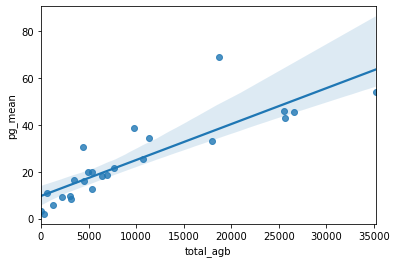

In [33]:
sns.regplot(x='total_agb', y='pg_mean', data=data_frame)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(data_frame.total_agb, data_frame.pg_mean)

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

In [34]:
subset_all_df = pg_all_df_clean[["pg_mean", "pg_min", 'pg_max', 'pg_med',"total_agb"]]
subset_no0_df = pg_no0_df_clean[["pg_mean", "pg_min", 'pg_max', 'pg_med',"total_agb"]]
subset_some0_df = pg_some0_df_clean[["pg_mean", "pg_min", 'pg_max', 'pg_med',"total_agb"]]

In [36]:
subset_all_df.to_csv(os.path.join(output_dir, "subset_all_df.csv"))
subset_no0_df.to_csv(os.path.join(output_dir, "subset_no0_df.csv"))
subset_some0_df.to_csv(os.path.join(output_dir, "subset_some0_df.csv"))

## Adjust the subset of data to analyse

In [37]:
#df = subset_all_df
#df = subset_no0_df
df = subset_some0_df

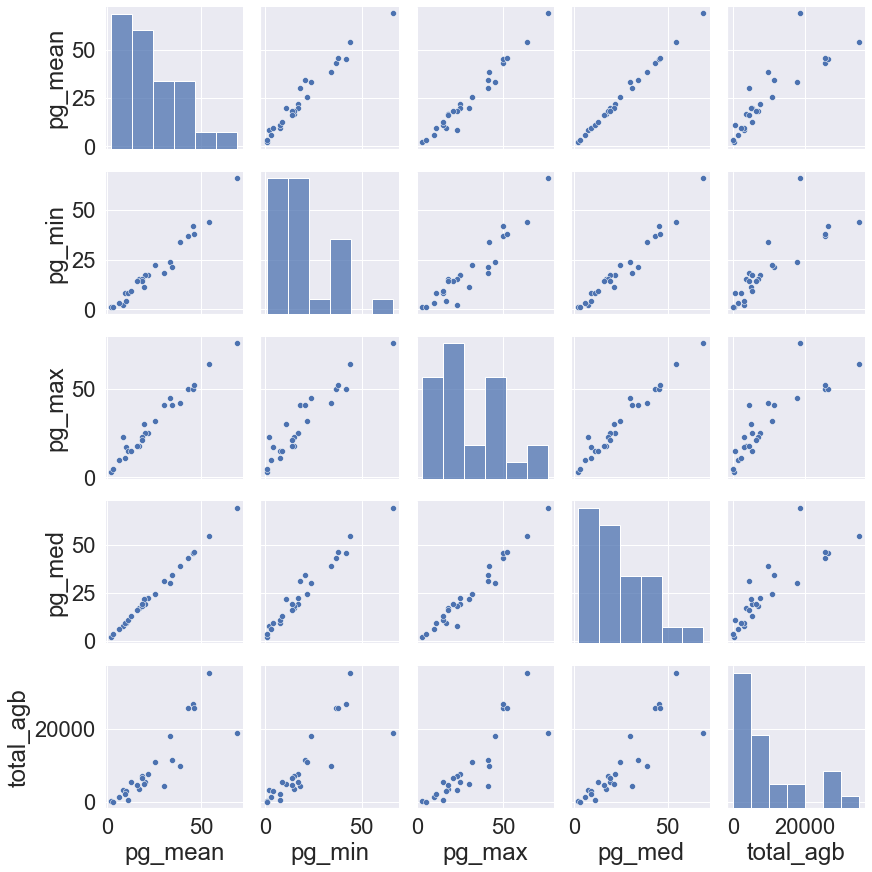

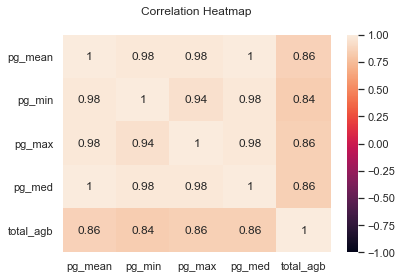

++++++++++++++++++++++++++++++++++++++++++++++++++


In [38]:
# pair plot
sns.set(font_scale = 2)
#print(frame.head(2))
sns.pairplot(df)
plt.show()

# heatmap
sns.set(font_scale = 1)
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=20)
plt.show()
print("+"*50)

In [39]:
value_a = 'pg_mean'
value_b = 'total_agb'
# df = subset_all_df
# df = subset_no0df

C:\Users\rmcgr\.conda\envs\zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\.conda\envs\zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


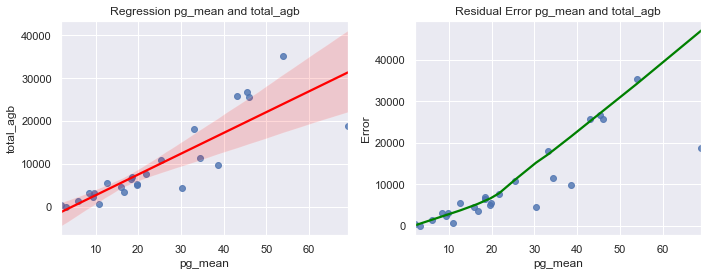

In [40]:
plt.figure(figsize=(10,4))
# left plot
plt.subplot(1,2,1)
sns.regplot(df[value_a], df[value_b], line_kws={"color":"red"})
plt.xlabel(value_a)
plt.ylabel(value_b)
plt.title("Regression {0} and {1}".format(value_a, value_b))

# right plot
plt.subplot(1,2,2)
sns.regplot(df[value_a], df[value_b], lowess=True, line_kws={"color":"green"})
plt.xlabel(value_a)
plt.ylabel("Error")
plt.title("Residual Error {0} and {1}".format(value_a, value_b))
plt.tight_layout()

In [41]:
x = df[value_a]
y = df[value_b]

In [42]:
X = sm.add_constant(x)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              total_agb   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     66.56
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           3.06e-08
Time:                        16:13:08   Log-Likelihood:                -247.44
No. Observations:                  25   AIC:                             498.9
Df Residuals:                      23   BIC:                             501.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2224.1195   1769.055     -1.257      0.2

In [43]:
value_ = value_b

C:\Users\rmcgr\.conda\envs\zonal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


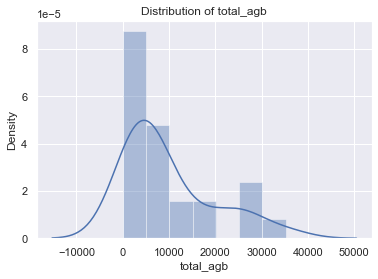

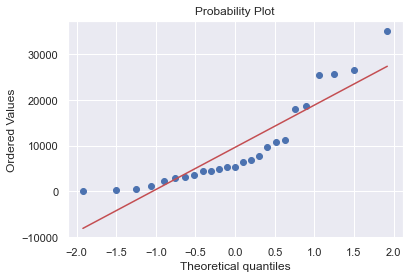

In [44]:
sns.distplot(df[value_]).set_title("Distribution of {0}".format(value_))

# probability plot
fig = plt.figure()
res = sc.probplot(df[value_], plot=plt)

### Due to the positive skewness a log transformation should be applied to correct data to a normal distribution

C:\Users\rmcgr\.conda\envs\zonal\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rmcgr\.conda\envs\zonal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mean = 8.35 and std dev = 2.04



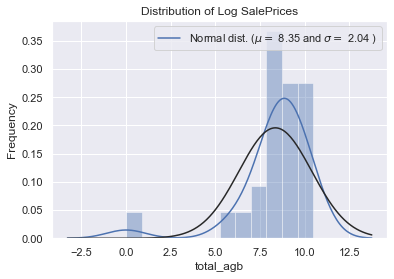

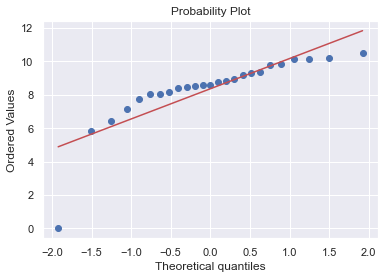

In [45]:
#Using the log1p function applies log(1+x) to all elements of the column
df[value_] = np.log1p(df[value_])

#Check the new distribution after log transformation 
sns.distplot(df[value_], fit=sc.norm)

# Get the fitted parameters used by the function
(mu, sigma) = sc.norm.fit(df[value_])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#NPlotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log SalePrices')

#Also the QQ plot
fig = plt.figure()
res = sc.probplot(df[value_], plot=plt)
plt.show()